In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## 数据基本信息

### 导入数据

In [2]:
df = pd.read_csv("p17.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 基本信息

In [3]:
# 整体的数据量

df.shape

(614, 13)

In [4]:
# 全部字段

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# 查看字段类型

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# 查看描述统计信息

df.describe()  

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### 缺失值情况

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

可以看到部分字段存在缺失值

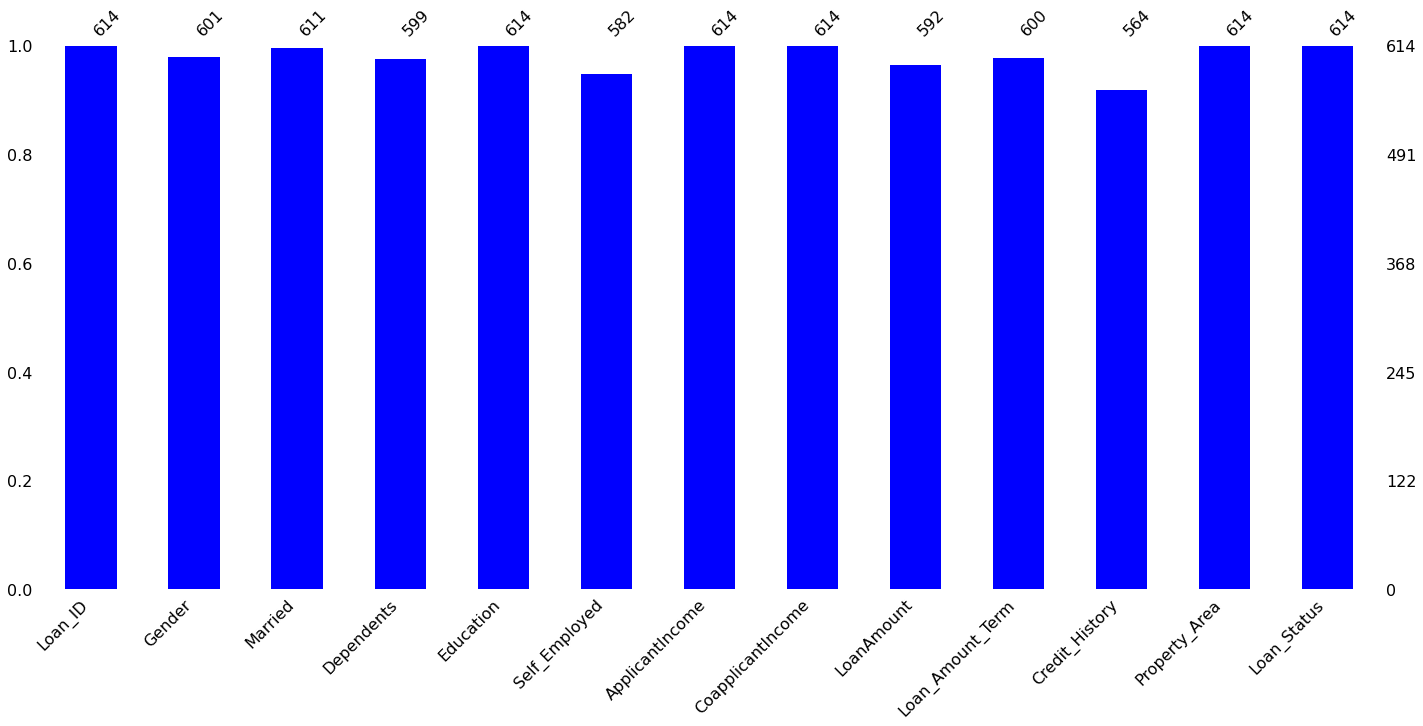

In [8]:
mso.bar(df,color="blue")

plt.show()

后面会针对缺失值进行填充处理。

## 数据探索EDA

### 分类型变量

#### Loan_ID

In [9]:
df.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

可以看到每个Loan_ID刚好一条记录

#### Gender

In [10]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

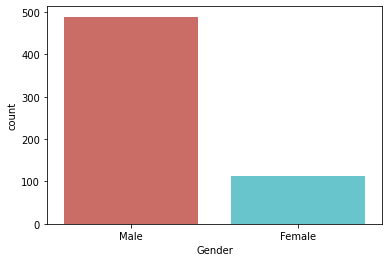

In [11]:
sns.countplot(x="Gender", data=df, palette="hls")

plt.show()

In [12]:
countMale = len(df[df.Gender == 'Male'])  # 男性数据
countFemale = len(df[df.Gender == 'Female'])  # 女性数据
countNull = len(df[df.Gender.isnull()])  # 缺失值数量

In [13]:
print("Percentage of Male: {:.2f}%".format((countMale / (len(df.Gender)) * 100)))
print("Percentage of Female: {:.2f}%".format((countFemale / (len(df.Gender)) * 100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender)) * 100)))

Percentage of Male: 79.64%
Percentage of Female: 18.24%
Missing values percentage: 2.12%


#### Married

In [14]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

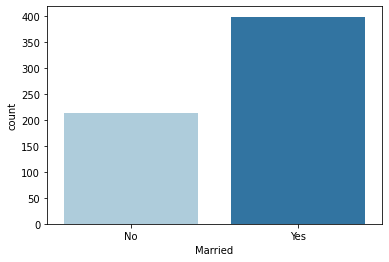

In [15]:
sns.countplot(x="Married", data=df, palette="Paired")

plt.show()

In [16]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

In [17]:
print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


#### Education

In [18]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

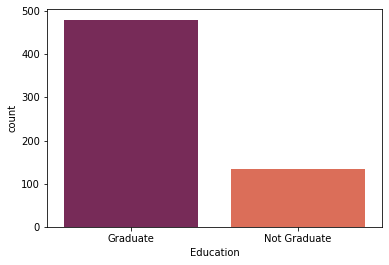

In [19]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [20]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing percentage: 0.00%


#### Self Employed

In [21]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

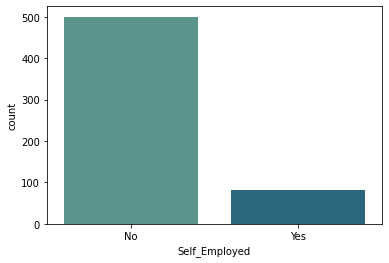

In [22]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [23]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


#### Credit History

In [24]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

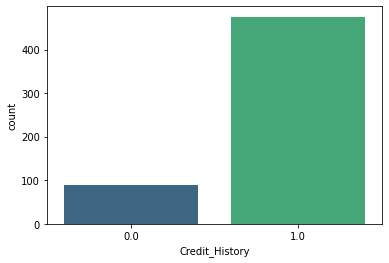

In [25]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [26]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

In [27]:
print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


#### Property Area

In [28]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

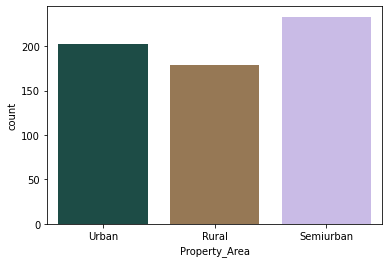

In [29]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [30]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

In [31]:
print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


这个字段在3个不同的取值下分布是均匀的，而且没有缺失值

#### Loan Status

In [32]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

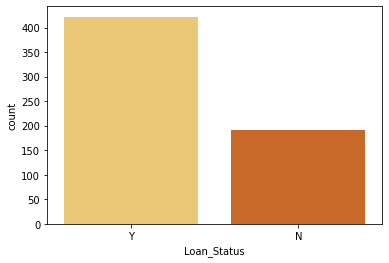

In [33]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [34]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


####  Loan Amount Term

In [35]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

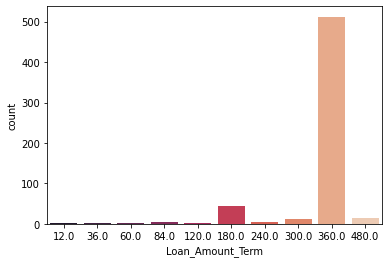

In [36]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [37]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


### 数值型变量

#### 描述统计信息

In [38]:
df.select_dtypes(exclude=["object"]).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [39]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


#### 字段直方图分布

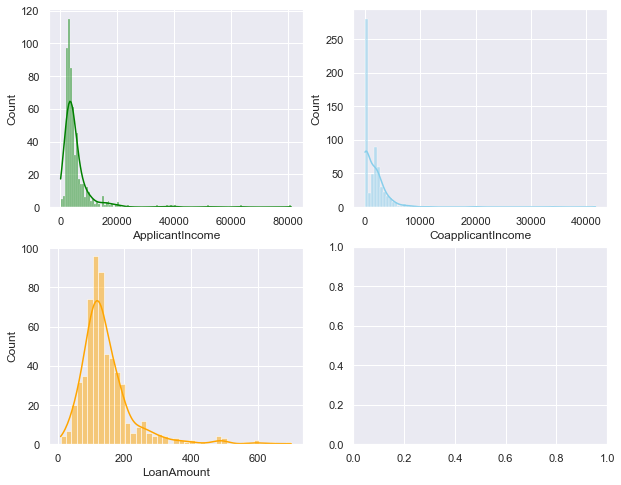

In [40]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

可以看到这3个字段呈现一定的偏态，后面会做数据转换处理。

#### 字段小提琴图分布

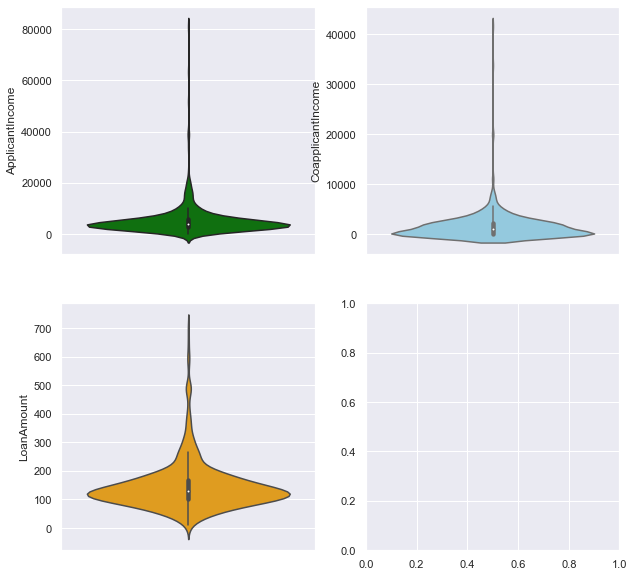

In [41]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

## 两两特征分布

### 两个分类型变量

分类型变量主要是基于统计分析查看分布情况：

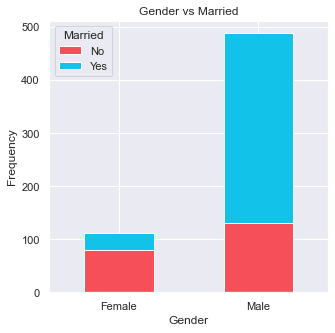

In [42]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])

plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

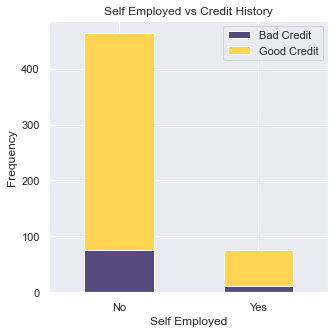

In [43]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

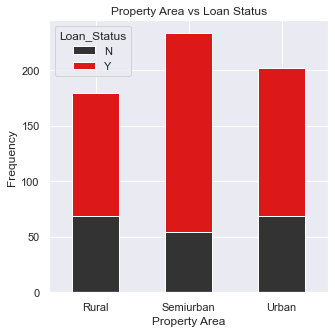

In [44]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### 分类型+数值型变量

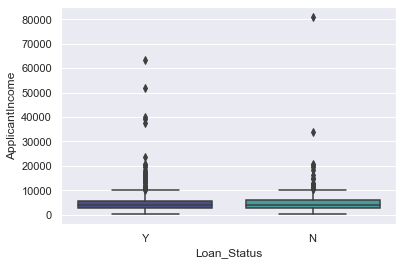

In [45]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

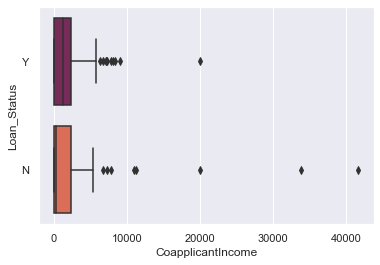

In [46]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

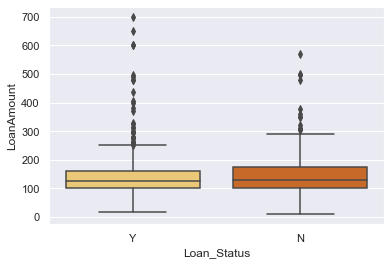

In [47]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

### 两个数值型变量

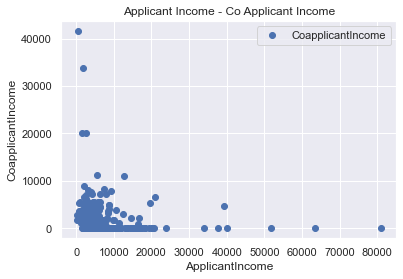

In [48]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()

In [49]:
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915661, pvalue=1.4609839484240346e-40)


## 相关性分析

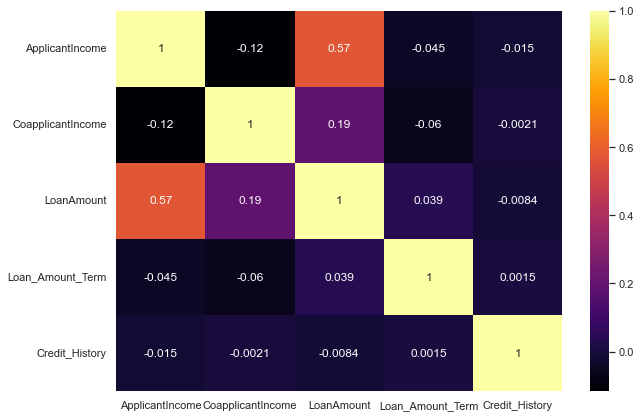

In [50]:
plt.figure(figsize=(10,7))

sns.heatmap(df.corr(), annot=True, cmap='inferno')

plt.show()

## 特征工程（数据预处理）

### 删除无效变量Drop Unecessary Variables

In [51]:
df.drop("Loan_ID",axis=1, inplace=True)  

### 填充缺失值Data Imputation

In [52]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [54]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [55]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

#### 分类型变量

针对分类型变量的缺失值，我们使用**众数mode**进行填充：

In [56]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
# 信用卡历史记录  0-bad credit  1-good credit history 
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
# 还款周期（天）
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

#### 数值型变量

数值型变量的缺失值使用**均值mean**进行填充

In [57]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)  # 贷款金额

### 独热码One-hot Encoding

In [58]:
df = pd.get_dummies(df)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1


In [59]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [60]:
# 删除部分字段
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate','Self_Employed_No', 'Loan_Status_N'], axis = 1)

In [61]:
# 字段重命名

new = {'Gender_Male': 'Gender', 
       'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 
       'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

### 删除离群点remove outliers

以上下4分位数作为临界点：

In [62]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

### 偏态分布处理Skewed Distribution Treatment
对数据开平方做数据转换：np.sqrt

In [63]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

再次查看数据分布：

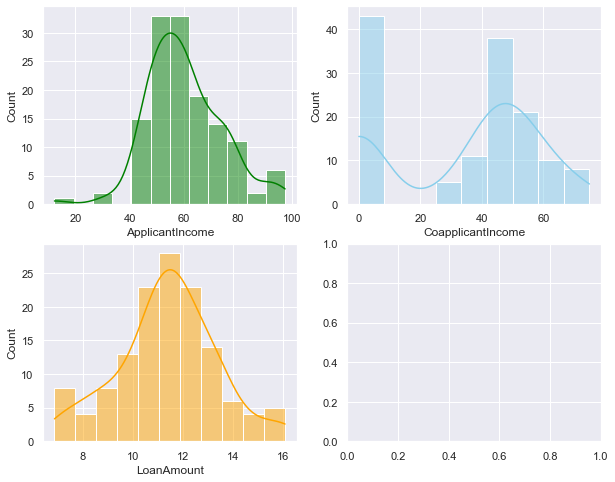

In [64]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

## 建模

### 特征分离

In [65]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

### SMOTE上采样

In [66]:
pd.value_counts(y)  # 采样前

1    112
0     24
Name: Loan_Status, dtype: int64

In [67]:
X, y = SMOTE().fit_resample(X, y)

In [68]:
pd.value_counts(y)  # 采样后

1    112
0    112
Name: Loan_Status, dtype: int64

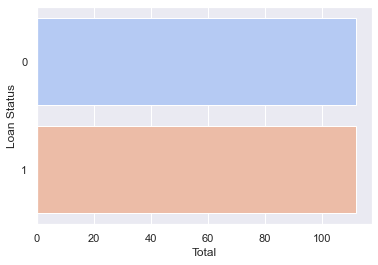

In [69]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

### 数据标准化Data Normalization

In [70]:
mm = MinMaxScaler()
X = mm.fit_transform(X)

### 切分训练集和测试集

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 模型1-Logistic Regression

In [72]:
pd.value_counts(y_train)

1    90
0    89
Name: Loan_Status, dtype: int64

In [73]:
pd.value_counts(y_test)

0    23
1    22
Name: Loan_Status, dtype: int64

In [74]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

# 模型预测
y_pred = LRclassifier.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))  # 分类结果报告

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.86      0.82      0.84        22

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.84      0.84      0.84        45



In [76]:
print(confusion_matrix(y_test, y_pred))  # 混淆矩阵

[[20  3]
 [ 4 18]]


In [77]:
LRAcc = accuracy_score(y_pred,y_test)   # 准确率

print('LR accuracy: {:.2f}%'.format(LRAcc * 100))

LR accuracy: 84.44%


### 模型2-K-Nearest Neighbour(KNN)

新版本报错解决，参考：https://blog.csdn.net/weixin_51723388/article/details/128577782


> 在使用KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto',
leaf_size=30, p=2, metric='minkowski', metric_params=None,
n_jobs=None)时，只有在weights='uniform'
时才会用到stats.mode。其中uniform是均等权重，即邻域中的所有点的权重相等，相当于取众数。可将其改为weights='distance'

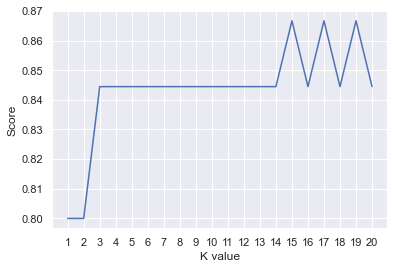

KNN best accuracy: 86.67%


In [78]:
score_list = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i,weights='distance')
    knn.fit(X_train, y_train)
    score_list.append(knn.score(X_test, y_test))  # 测试集预测得分
    
plt.plot(range(1,21), score_list)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

KNAcc = max(score_list)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

### 模型3-支持向量机Support Vector Machine (SVM)

In [79]:
svc = SVC(kernel='rbf', max_iter=500)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.88      0.95      0.91        22

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

[[20  3]
 [ 1 21]]


In [80]:
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

SVC accuracy: 91.11%


### 模型4-高斯朴素贝叶斯Gaussian NB

In [81]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        23
           1       0.94      0.73      0.82        22

    accuracy                           0.84        45
   macro avg       0.86      0.84      0.84        45
weighted avg       0.86      0.84      0.84        45

[[22  1]
 [ 6 16]]


In [82]:
GNBAcc = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(GNBAcc*100))

Gaussian Naive Bayes accuracy: 84.44%


### 模型5-决策树Decision Tree

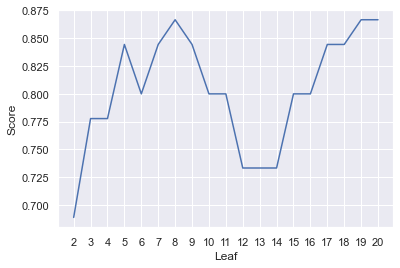

Decision Tree Accuracy: 86.67%


In [83]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

### 模型6-随机森林Random Forest

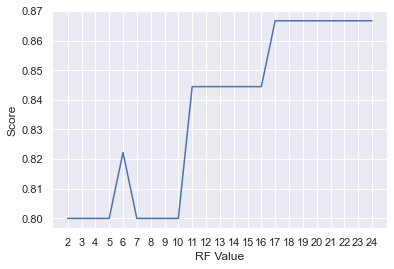

Random Forest Accuracy:  86.67%


In [84]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, 
                                          random_state = 1, 
                                          max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)

print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

### 模型7-梯度提升树Gradient Boosting

In [85]:
# 设置参数
params={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [86]:
# 基于随机搜索查找参数组合

GB = RandomizedSearchCV(GradientBoostingClassifier(), params, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [87]:
print(GB.best_estimator_)
print(GB.best_score_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=30, n_estimators=200,
                           subsample=1)
0.8


In [88]:
print(GB.best_params_)  # 最佳参数组合

{'subsample': 1, 'n_estimators': 200, 'max_leaf_nodes': 30, 'max_depth': 5}


In [89]:
GB.best_params_["subsample"]

1

基于查找到的参数再重新建模：

In [90]:
gbc = GradientBoostingClassifier(subsample=GB.best_params_["subsample"], 
                                 n_estimators=GB.best_params_["n_estimators"], 
                                 max_depth=GB.best_params_["max_depth"], 
                                 max_leaf_nodes=GB.best_params_["max_leaf_nodes"], 
                                )
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.89      0.77      0.83        22

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45

[[21  2]
 [ 5 17]]


In [91]:
GBAcc = accuracy_score(y_pred,y_test)

print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

Gradient Boosting accuracy: 84.44%


## 模型比较

In [92]:
models = pd.DataFrame({'Model': ['Logistic Regression',
                                 'K Neighbors', 
                                  'Support Vector Machine', 
                                  'Gaussian NB',
                                  'Decision Tree', 
                                  'Random Forest', 
                                 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, 
                                     SVCAcc*100,GNBAcc*100, 
                                     DTAcc*100, RFAcc*100, 
                                     GBAcc*100]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Support Vector Machine,91.111111
1,K Neighbors,86.666667
4,Decision Tree,86.666667
5,Random Forest,86.666667
0,Logistic Regression,84.444444
3,Gaussian NB,84.444444
6,Gradient Boost,84.444444
